### Building and training a basic ML model to predict math score

##### Topics covered in this notebook
- Model Training
- Choosing the best performing model

#### 1. Import all the necessary packages/libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#### 2. Import data

In [2]:
df = pd.read_csv('/Users/dhairya/Documents/Github/Student Performance Indicator/data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3. Define input features and target variable

In [3]:
X = df.drop(columns='math score', axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [4]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

#### 4. Display the categorical and numerial features

In [5]:
for col in X.columns:
    if col not in ['reading score', 'writing score']:
        print("Categories in {} are: {}".format(col, df[col].unique()))

Categories in gender are: ['female' 'male']
Categories in race/ethnicity are: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch are: ['standard' 'free/reduced']
Categories in test preparation course are: ['none' 'completed']


#### 5. Perform data transformation

In [6]:
numerical_features = X.select_dtypes(exclude='object').columns
numerical_features

Index(['reading score', 'writing score'], dtype='object')

In [7]:
categorical_features = X.select_dtypes(include='object').columns
categorical_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transform = StandardScaler()
categoric_transform = OneHotEncoder()

col_transformer = ColumnTransformer(
    [
        ("OneHotEncoder", categoric_transform, categorical_features),
        ("StandardScaler", numeric_transform, numerical_features),
    ]
)

In [9]:
X = col_transformer.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [10]:
X.shape

(1000, 19)

#### 6. Split the dataset into train and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### 7. Create an evaluation function that calculates the value of all metrics

In [12]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

#### 8. Define models

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "K-Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

#### 9. Train and evaluate the models

In [14]:
mae_list = []
rmse_list = []
r2_list = []

for key in models.keys():
    model = models[key]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate(y_test, y_test_pred)

    print(f"{key} performace for training set:")
    print(f"- Mean Absolute Error: {round(train_mae, 2)}")
    print(f"- Root Mean Squared Error: {round(train_rmse, 2)}")
    print(f"- R2 Score: {round(train_r2, 2)}")
    print("-----------------------------------------------------")
    print(f"{key} performace for testing set:")
    print(f"- Mean Absolute Error: {round(test_mae, 2)}")
    print(f"- Root Mean Squared Error: {round(test_rmse, 2)}")
    print(f"- R2 Score: {round(test_r2, 2)}")

    mae_list.append(round(test_mae, 2))
    rmse_list.append(round(test_rmse, 2))
    r2_list.append(round(test_r2, 2))

Linear Regression performace for training set:
- Mean Absolute Error: 4.29
- Root Mean Squared Error: 5.34
- R2 Score: 0.87
-----------------------------------------------------
Linear Regression performace for testing set:
- Mean Absolute Error: 4.18
- Root Mean Squared Error: 5.36
- R2 Score: 0.88
Ridge performace for training set:
- Mean Absolute Error: 4.26
- Root Mean Squared Error: 5.32
- R2 Score: 0.87
-----------------------------------------------------
Ridge performace for testing set:
- Mean Absolute Error: 4.21
- Root Mean Squared Error: 5.39
- R2 Score: 0.88
Lasso performace for training set:
- Mean Absolute Error: 5.21
- Root Mean Squared Error: 6.59
- R2 Score: 0.81
-----------------------------------------------------
Lasso performace for testing set:
- Mean Absolute Error: 5.16
- Root Mean Squared Error: 6.52
- R2 Score: 0.83
K-Neighbors Regression performace for training set:
- Mean Absolute Error: 4.51
- Root Mean Squared Error: 5.71
- R2 Score: 0.86
----------------

In [15]:
pd.DataFrame(list(zip(list(models.keys()), r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.88
1,Ridge,0.88
5,Random Forest Regressor,0.85
6,AdaBoost Regressor,0.85
2,Lasso,0.83
3,K-Neighbors Regression,0.78
4,Decision Tree Regression,0.74


Let's pick Linear Regression as the best performing model.

In [16]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg = linear_reg.fit(X_train, y_train)
y_test_pred = linear_reg.predict(X_test)
r2_score_test = r2_score(y_test, y_test_pred) * 100
print("Accuracy of the Linear Regression Model is: {} %".format(round(r2_score_test, 2)))

Accuracy of the Linear Regression Model is: 88.21 %


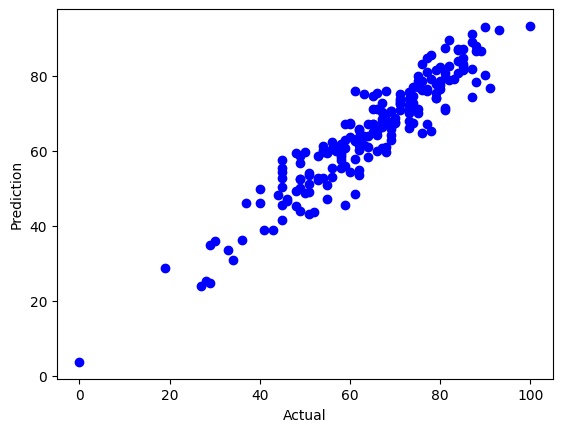

In [17]:
plt.scatter(y_test, y_test_pred, color='blue')
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

<Axes: xlabel='math score'>

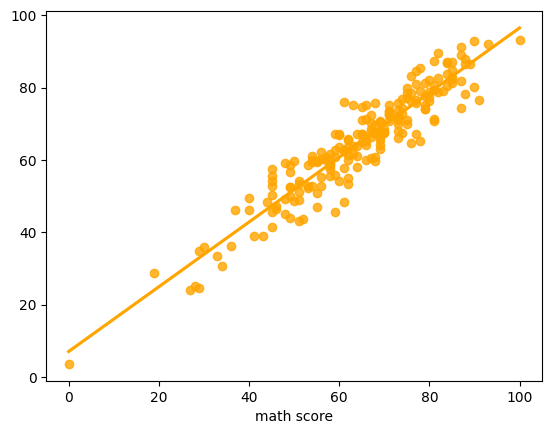

In [18]:
sns.regplot(x=y_test, y=y_test_pred, ci=None, color='orange')

In [19]:
pred_diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_test_pred, 'Difference': y_test - y_test_pred})
pred_diff

,Actual Value,Predicted Value,Difference
521,91,76.5625,14.4375
737,53,58.5000,-5.5000
740,80,77.4375,2.5625
660,74,76.9375,-2.9375
411,84,87.0625,-3.0625
...,...,...,...
408,52,43.6875,8.3125
332,62,61.5000,0.5000
208,74,67.4375,6.5625
613,65,67.1875,-2.1875
